# EXAMPLE OF FEDERATED LEARNING APPLICATION
## Safety, Privacy and Legal Aspects

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd

from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from tensorflow.keras import regularizers
from plot_keras_history import show_history, plot_history
from tensorflow.keras.models import load_model

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

forma de la imagen (pixeles): (28, 28)
etiqueta de la imagen: 0


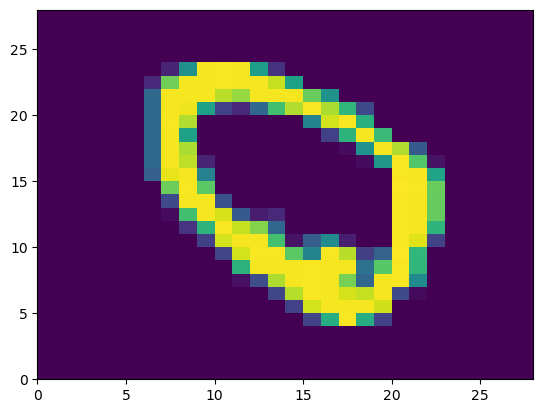

In [3]:
#visuzalización imagen de ejemplo
plt.pcolormesh(X_train[1,:,:])
print('forma de la imagen (pixeles): '+str(np.shape(X_train[1,:,:])))
print('etiqueta de la imagen: '+str(y_train[1]))

In [4]:
# Read the MNIST data and process it. 
#reshape, to_categorical, reescalamiento

X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print('forma final de los datos:')
print(X_train.shape)
print('fotos aplanadas en vectores de longitud 28*28=784')
print(y_train.shape)
print('etiquetas en forma de vectores binarios de longitud 10')

forma final de los datos:
(60000, 784)
fotos aplanadas en vectores de longitud 28*28=784
(60000, 10)
etiquetas en forma de vectores binarios de longitud 10


In [6]:
# Create 3 clients from the train data. You can do it as you prefer, either using slices 
# (e.g. client1_x = X_train[:len(X_train)//3]), creating a function that makes it automatic according
# to the number of clients desired (remember that two different customers cannot have data in common),
# or any other way you can think of.
n = len(y_train)
arr = np.arange(0, n)
np.random.shuffle(arr)
subsets = np.array_split(arr, 3)

In [7]:
ind1 = subsets[0]
ind2 = subsets[1]
ind3 = subsets[2]

client1_x = X_train[ind1]
client1_y = y_train[ind1]

client2_x = X_train[ind2]
client2_y = y_train[ind2]

client3_x = X_train[ind3]
client3_y = y_train[ind3]

In [8]:
print(f'''Number of data for each customer: \n \t Client 1: {len(client1_x)}
     \t Client 2: {len(client2_x)} \n \t Client 3: {len(client3_x)}''')

Number of data for each customer: 
 	 Client 1: 20000
     	 Client 2: 20000 
 	 Client 3: 20000


In [9]:
# Check that the clients have been created correctly (that there is the same number of data in X_train as adding
# up all clients)
assert sum([len(client1_x), len(client2_x), len(client3_x)]) == len(X_train), 'Clients have not been created correctly'

In [10]:
# Create the model (neural network) with the layers you consider
model = keras.Sequential()
n1=100
n2=100

# model.add(layers.Conv2D())
# model.add(layers.MaxPooling2D())
# model.add(layers.Conv2D())
# flatten
# dense
# dense

model.add(layers.Dense(units = n1, input_dim = 784, activation = "sigmoid")) 
model.add(layers.Dense(units = n2, activation = "sigmoid")) 
model.add(layers.Dense(units = 10 , activation = "sigmoid"))
# If you wish you can modify the way the model is compiled

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
model.summary()

# model.compile(
#   optimizer = keras.optimizers.SGD(0.1), # Stochastic Gradient Descent (SGD) con un learning rate de 0.1
#   # optimizer = keras.optimizers.SGD(0.1, momentum = 0.01), # Con momento
#   # Una de las ventajas del optimizador SGD es que en cada iteración se utiliza un subgrupo de muestras diferente lo que evita caer en mínimos locales
#   loss = "mse",
#   metrics = ["accuracy"]
#)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
ep = 10 #num epocas
bs = 10 #batch size

In [12]:
#ronda 1
weights_for_layer1 = np.random.randn(784, n1)
biases_for_layer1 = np.ones(n1) 
weights_for_layer2 = np.random.randn(n1, n2)
biases_for_layer2 = np.ones(n2)
weights_for_layer3 = np.random.randn(n2, 10)
biases_for_layer3 = np.ones(10)

# Train for the first client
model.layers[0].set_weights([weights_for_layer1, biases_for_layer1])
model.layers[1].set_weights([weights_for_layer2, biases_for_layer2])
model.layers[2].set_weights([weights_for_layer3, biases_for_layer3])

model.fit(client1_x, client1_y, epochs = ep, batch_size = bs)

w1cl1, b1cl1 = model.layers[0].get_weights()
w2cl1, b2cl1 = model.layers[1].get_weights()
w3cl1, b3cl1 = model.layers[2].get_weights()

# Train for the second client (remember to give the model the initial weights).

model.layers[0].set_weights([weights_for_layer1, biases_for_layer1])
model.layers[1].set_weights([weights_for_layer2, biases_for_layer2])
model.layers[2].set_weights([weights_for_layer3, biases_for_layer3])

model.fit(client2_x, client2_y, epochs = ep, batch_size = bs)

w1cl2, b1cl2 = model.layers[0].get_weights()
w2cl2, b2cl2 = model.layers[1].get_weights()
w3cl2, b3cl2 = model.layers[2].get_weights()

# Train for the third client (remember to set the initial weights for the model).
model.layers[0].set_weights([weights_for_layer1, biases_for_layer1])
model.layers[1].set_weights([weights_for_layer2, biases_for_layer2])
model.layers[2].set_weights([weights_for_layer3, biases_for_layer3])

model.fit(client3_x, client3_y, epochs = ep, batch_size = bs)
# Obtain client 1 weights:
w1cl3, b1cl3 = model.layers[0].get_weights()
w2cl3, b2cl3 = model.layers[1].get_weights()
w3cl3, b3cl3 = model.layers[2].get_weights()


# Aggregate the weights obtained with each client using an aggregation function that performs a weighted average:

#la suma ponderada coincide con la media aritmetica tiendo en cuenta que los subconjuntos de datos tienen el mismo 
#número de elementos
avg_w1 = (w1cl1+w1cl2+w1cl3)/3
avg_w2 = (w2cl1+w2cl2+w2cl3)/3
avg_w3 = (w3cl1+w3cl2+w3cl3)/3

avg_b1 = (b1cl1+b1cl2+b1cl3)/3
avg_b2 = (b2cl1+b2cl2+b2cl3)/3
avg_b3 = (b3cl1+b3cl2+b3cl3)/3

# Save the resulting model (with the new weights), you will use it to train on the test set:

model.layers[0].set_weights([avg_w1, avg_b1])
model.layers[1].set_weights([avg_w2, avg_b2])
model.layers[2].set_weights([avg_w3, avg_b3])

model.save('model1.h5')
model.save('model1.keras')
# Repeat the above process 2 more times (you can use a loop if you wish). Remember to update the weights
# of the model as corresponds in each case 

Epoch 1/10


2000/2000 [==============================] - 5s 2ms/step - loss: 1.2887 - accuracy: 0.6615
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4614 - accuracy: 0.8593
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.9008
Epoch 4/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2643 - accuracy: 0.9214
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2192 - accuracy: 0.9351
Epoch 6/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1844 - accuracy: 0.9470
Epoch 7/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1576 - accuracy: 0.9553
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1371 - accuracy: 0.9610
Epoch 9/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1205 - accuracy: 0.9650
Epoch 10/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1

C:\Users\migue\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
#resto de rondas
for i in np.arange(2,4):
    weights_for_layer1, biases_for_layer1 = model.layers[0].get_weights() 
    weights_for_layer2, biases_for_layer2 = model.layers[1].get_weights() 
    weights_for_layer3, biases_for_layer3 = model.layers[2].get_weights() 
    
    # Train for the first client
    
    model.fit(client1_x, client1_y, epochs = ep, batch_size = bs)
    
    w1cl1, b1cl1 = model.layers[0].get_weights()
    w2cl1, b2cl1 = model.layers[1].get_weights()
    w3cl1, b3cl1 = model.layers[2].get_weights()
    
    # Train for the second client (remember to give the model the initial weights).
    
    model.layers[0].set_weights([weights_for_layer1, biases_for_layer1])
    model.layers[1].set_weights([weights_for_layer2, biases_for_layer2])
    model.layers[2].set_weights([weights_for_layer3, biases_for_layer3])
    
    model.fit(client2_x, client2_y, epochs = ep, batch_size = bs)
    
    w1cl2, b1cl2 = model.layers[0].get_weights()
    w2cl2, b2cl2 = model.layers[1].get_weights()
    w3cl2, b3cl2 = model.layers[2].get_weights()
    
    # Train for the third client (remember to set the initial weights for the model).
    model.layers[0].set_weights([weights_for_layer1, biases_for_layer1])
    model.layers[1].set_weights([weights_for_layer2, biases_for_layer2])
    model.layers[2].set_weights([weights_for_layer3, biases_for_layer3])
    
    model.fit(client3_x, client3_y, epochs = ep, batch_size = bs)
    # Obtain client 1 weights:
    w1cl3, b1cl3 = model.layers[0].get_weights()
    w2cl3, b2cl3 = model.layers[1].get_weights()
    w3cl3, b3cl3 = model.layers[2].get_weights()
    
    # Aggregate the weights obtained with each client using an aggregation function that performs a weighted average:
    
    #la suma ponderada coincide con la media aritmetica tiendo en cuenta que los subconjuntos de datos tienen el mismo 
    #número de elementos
    avg_w1 = (w1cl1+w1cl2+w1cl3)/3
    avg_w2 = (w2cl1+w2cl2+w2cl3)/3
    avg_w3 = (w3cl1+w3cl2+w3cl3)/3
    
    avg_b1 = (b1cl1+b1cl2+b1cl3)/3
    avg_b2 = (b2cl1+b2cl2+b2cl3)/3
    avg_b3 = (b3cl1+b3cl2+b3cl3)/3
    
    # Save the resulting model (with the new weights), you will use it to train on the test set:
    
    model.layers[0].set_weights([avg_w1, avg_b1])
    model.layers[1].set_weights([avg_w2, avg_b2])
    model.layers[2].set_weights([avg_w3, avg_b3])
    
    model.save('model'+str(i)+'.h5')
    model.save('model'+str(i)+'.keras')

Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2136 - accuracy: 0.9388
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9521
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1403 - accuracy: 0.9600
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9662
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9717
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0900 - accuracy: 0.9761
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9789
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9808
Epoch 9/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.9840
Epoch 10/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.054


**HINT**: some functions you need to know: set_weights, get_weights. Create an auxiliary function to aggregate the weights. This function will receive the number of data for each client (so that the average is weighted), and the weights for each of them. 

Let $N$ be the number of clients and $n_i$ the number of data for each of these, remember that this aggregation function is given by:

$$
\sum_{i=1}^{N} w_{i} \cdot weights\_client\_i
$$

$$
w_i = \frac{n_i}{\sum_{i=1}^{N}n_{i}} \hspace{0.5cm} \forall i \in \{1,...,N\}
$$

In [14]:
# Evaluate each saved model (you should have model1.h5, model2.h5 and model3.h5) with the test data,
# display and analyze the obtained results:

testEval = np.empty((3,2))
for i in np.arange(3):
    modelprueba = load_model('model'+str(i+1)+'.keras')
    m_eval = modelprueba.evaluate(X_test, y_test, batch_size=100)
    testEval[i] = m_eval

100/100 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9546


In [15]:
dataEval = pd.DataFrame({'Loss': testEval[:,0],
                        'Accuracy': testEval[:,1]})
dataEval

,Loss,Accuracy
0,0.272763,0.9259
1,0.207298,0.9498
2,0.196519,0.9546


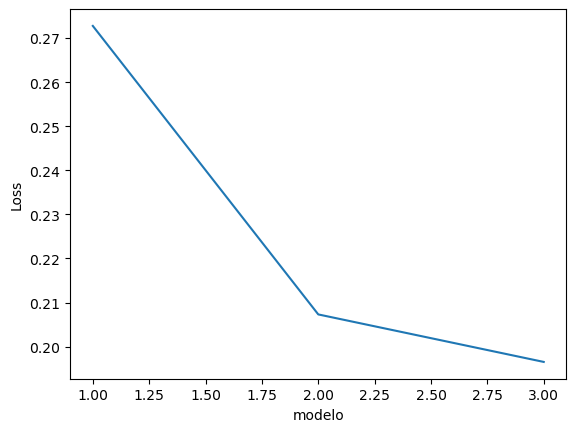

In [16]:
plt.plot(np.array([1,2,3]),testEval[:,0])
plt.xlabel('modelo')
plt.ylabel('Loss')
plt.show()

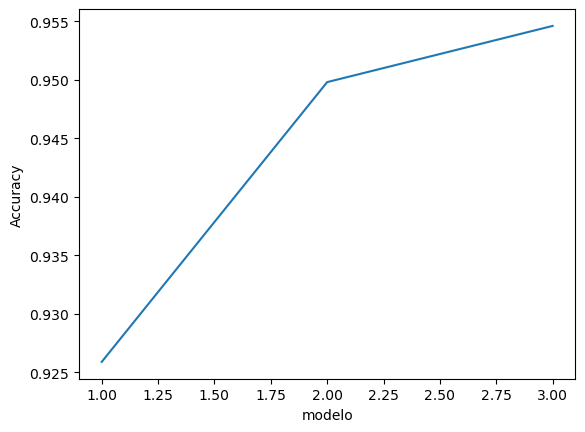

In [17]:
plt.plot(np.array([1,2,3]),testEval[:,1])
plt.xlabel('modelo')
plt.ylabel('Accuracy')
plt.show()

Vemos que a medida que se hacen más rondas de entrenamiento del modelo mejoran las métricas loss y accuracy consideradas, y que por tanto el Federated Learning está permitiendo mejorar los modelos de cada cliente con los datos del resto accediendo solo a los pesos calculados.